In [7]:
import pandas as pd
metadata_filepath = r'C:\Users\tanma\OneDrive\Desktop\ml-trial\metadata_of_normalized_and_feature_selected.csv'
data_filepath = r'C:\Users\tanma\OneDrive\Desktop\ml-trial\normalized_and_feature_selected.csv'
metadata_df = pd.read_csv(metadata_filepath, index_col=0)
data_df = pd.read_csv(data_filepath,  index_col=0)

Started
OneDone
Done


In [8]:
print(data_df.shape)
data_df.head()

(35436, 3000)


,HES4,ISG15,TTLL10,CFAP74,MORN1,HES5,TP73,ERRFI1,PIK3CD-AS2,FBXO2,...,CH507-9B2.5,CH507-42P11.8,CH507-254M2.3,AP001347.6,ATP5J,C21orf59,ATP5O,AP000692.10,DSCR3,C21orf33
AAACCCAAGGCGACAT_1,-0.245342,-0.654464,-0.321928,-0.227773,-0.323629,-0.117457,1.059052,0.646571,1.693757,1.792633,...,-0.113451,-0.145029,-0.094676,-0.097025,-0.725331,-0.428374,-0.739072,-0.115149,-0.28135,-0.218466
AAACCCAGTACTCGAT_1,0.663890,-0.654464,-0.321928,-0.227773,-0.323629,-0.117457,1.648158,1.317635,-0.424334,1.509495,...,-0.113451,-0.145029,-0.094676,-0.097025,-0.725331,-0.428374,-0.739072,-0.115149,-0.28135,-0.218466
AAACCCAGTATGTGTC_1,-1.124862,-0.654464,-0.321928,-0.227773,-0.323629,-0.117457,-0.549411,0.751522,-0.424334,-0.836930,...,-0.113451,-0.145029,-0.094676,-0.097025,-0.725331,-0.428374,-0.739072,-0.115149,-0.28135,-0.218466
AAACCCAGTTAGCGGA_1,1.484936,0.113054,-0.321928,-0.227773,-0.323629,-0.117457,-0.549411,-0.227141,-0.424334,-0.209533,...,-0.113451,-0.145029,-0.094676,-0.097025,-0.725331,-0.428374,-0.739072,-0.115149,-0.28135,-0.218466
AAACCCAGTTGCCGAC_1,1.202926,-0.191326,-0.321928,-0.227773,-0.323629,1.949898,-0.549411,0.318160,-0.424334,-0.836930,...,-0.113451,-0.145029,-0.094676,-0.097025,-0.725331,-0.428374,-0.739072,-0.115149,-0.28135,-0.218466


In [9]:
print(metadata_df.shape)
metadata_df.head()

(35436, 5)


,donor,smoke,smoke_noT89,clusters_10,clusters_16a
AAACCCAAGGCGACAT_1,T101,heavy,heavy,c2,c2
AAACCCAGTACTCGAT_1,T101,heavy,heavy,c3,c3a
AAACCCAGTATGTGTC_1,T101,heavy,heavy,c4,c4
AAACCCAGTTAGCGGA_1,T101,heavy,heavy,c4,c4
AAACCCAGTTGCCGAC_1,T101,heavy,heavy,c1,c1


In [11]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_curve, auc

y = metadata_df['smoke']
responses = ['heavy', 'light', 'never']
encoded_responses = [1 if response != 'never' else 0 for response in y]

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data_df, encoded_responses, test_size=0.2, random_state=42)

In [12]:
# Training the logistic regression model
model = LogisticRegression(max_iter=100000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=100000)

In [16]:
# Predicting probabilities
y_probs = model.predict_proba(X_test)[:, 1]

# Predicting based on a default threshold of 0.5
y_pred = (y_probs > 0.5).astype(int)

In [17]:
# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")

Accuracy: 0.95372460496614
Precision: 0.954230973922299
Recall: 0.9583110636023516


In [18]:
# Finding the optimal threshold
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]

print(f"Optimal Threshold: {optimal_threshold}")

Optimal Threshold: 0.5701951320717072


In [24]:
# Threshold of 0.5702 as found optimal above
y_pred_opt = (y_probs > 0.5702).astype(int)
accuracy = accuracy_score(y_test, y_pred_opt)
precision = precision_score(y_test, y_pred_opt)
recall = recall_score(y_test, y_pred_opt)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")

Accuracy: 0.9544300225733634
Precision: 0.9576974564926373
Recall: 0.9559059326563335


In [20]:
from sklearn.metrics import roc_curve, roc_auc_score

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Compute AUC
auc = roc_auc_score(y_test, y_probs)
print(f"AUC: {auc}")

AUC: 0.9900409177354805


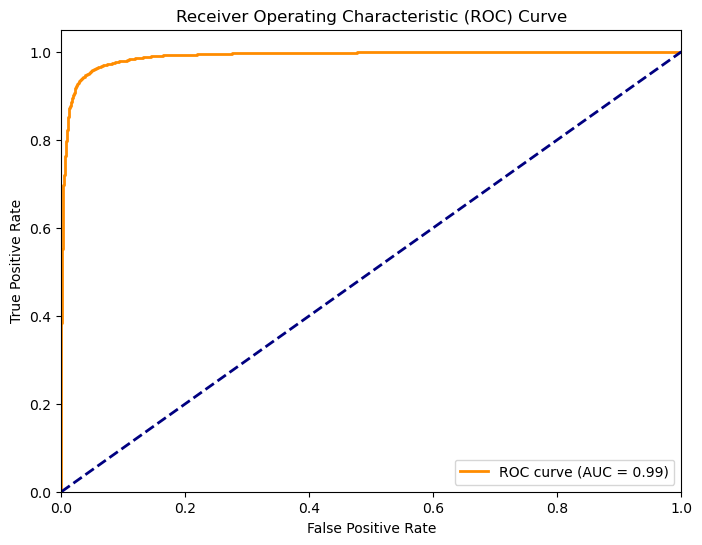

In [21]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

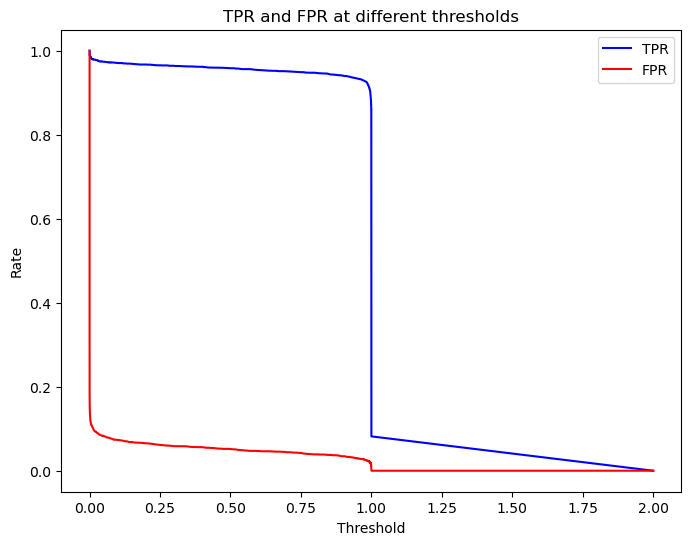

In [22]:
# Plotting thresholds
plt.figure(figsize=(8, 6))
plt.plot(thresholds, tpr, label='TPR', color='blue')
plt.plot(thresholds, fpr, label='FPR', color='red')
plt.xlabel('Threshold')
plt.ylabel('Rate')
plt.title('TPR and FPR at different thresholds')
plt.legend()
plt.show()

In [55]:
results = {}
patient_ids = metadata_df['donor']
X_train, X_test, patient_id_train, patient_id_test = train_test_split(data_df, patient_ids, test_size=0.2, random_state=42)
for pid, pred, y in zip(patient_id_train, y_pred, y_test):
    if pid not in results:
        results[pid] = {'correct': 0, 'incorrect': 0, 'smoker': 0, 'non_smoker': 0}
    if pred == y:
        results[pid]['correct'] += 1
    else:
        results[pid]['incorrect'] += 1
    if pred == 1:
        results[pid]['smoker'] += 1
    else:
        results[pid]['non_smoker'] += 1

# Convert the results to a DataFrame for easier plotting
results_df = pd.DataFrame(results).T  # Transpose to have patients as rows

In [56]:
results_df

,correct,incorrect,smoker,non_smoker
T166,483,21,255,249
T101,635,43,346,332
T126,365,16,183,198
T153,672,29,370,331
T167,523,22,288,257
T84,372,19,209,182
T121,264,13,154,123
T90,434,27,254,207
T154,328,11,169,170
T164,577,35,324,288


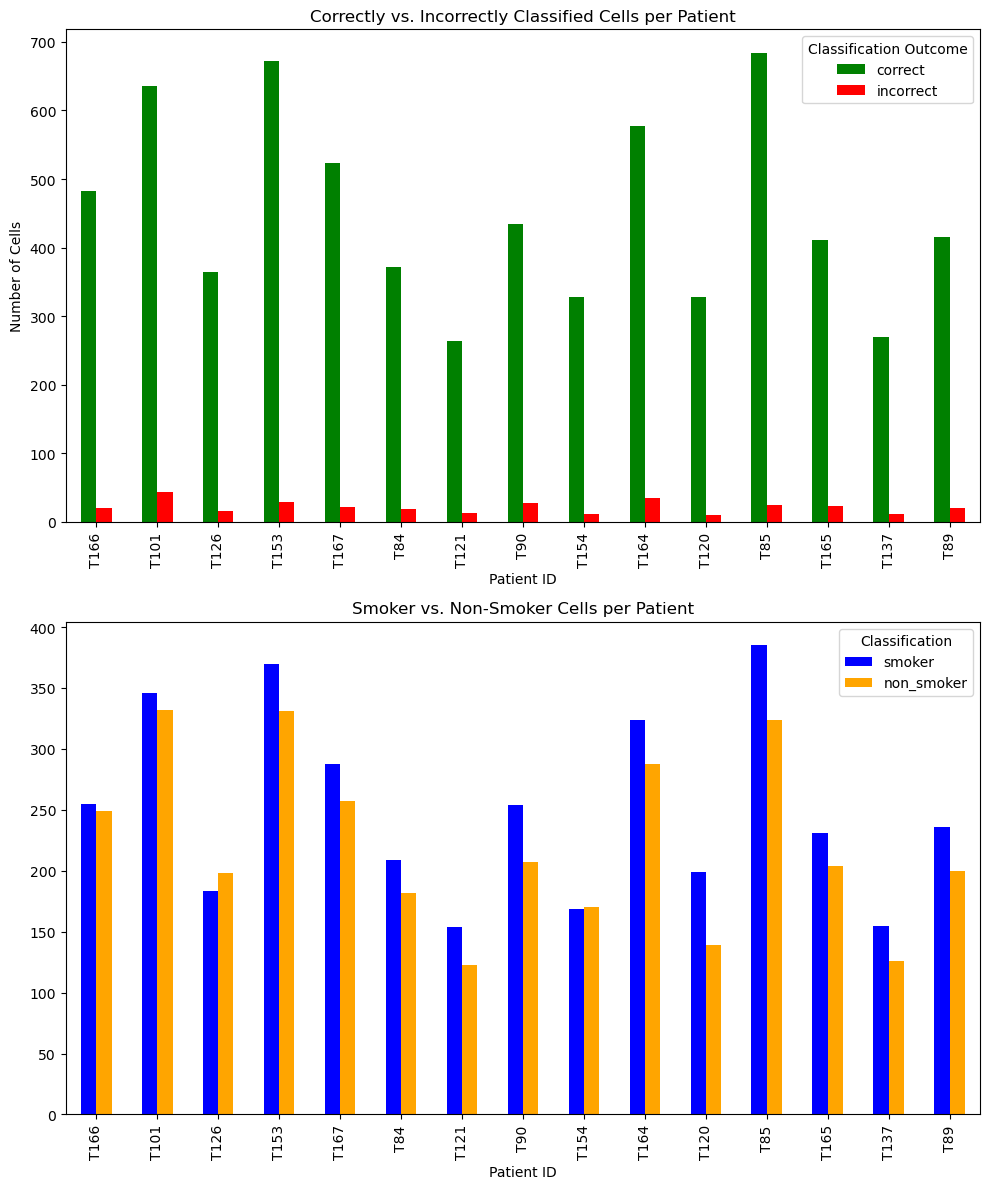

In [58]:
fig, ax = plt.subplots(2, 1, figsize=(10, 12))

# Plot for correct vs. incorrect classifications
results_df[['correct', 'incorrect']].plot(kind='bar', ax=ax[0], color=['green', 'red'])
ax[0].set_title('Correctly vs. Incorrectly Classified Cells per Patient')
ax[0].set_xlabel('Patient ID')
ax[0].set_ylabel('Number of Cells')
ax[0].legend(title='Classification Outcome')

# Plot for smoker vs. non-smoker counts
results_df[['smoker', 'non_smoker']].plot(kind='bar', ax=ax[1], color=['blue', 'orange'])
ax[1].set_title('Smoker vs. Non-Smoker Cells per Patient')
ax[1].set_xlabel('Patient ID')
ax[1].legend(title='Classification')

plt.tight_layout()
plt.show()

In [63]:
coefficients = model.coef_[0]
feature_names = X_test.columns
top_n = 10
top_features_indices = np.argsort(np.abs(coefficients))[-top_n:]
top_features_names = feature_names[top_features_indices]
top_coefficients = coefficients[top_features_indices]
print(top_features_names)
print(top_coefficients)

Index(['SLPI', 'TPPP3', 'LSP1', 'LY6D', 'S100P', 'PLCG2', 'MUC20-OT1',
       'CYP1B1', 'MSMB', 'MMP10'],
      dtype='object')
[-1.32360248 -1.34051856  1.43899358 -1.44043808  1.44819627  1.48658662
 -1.56866256  1.60274157  1.62350667 -1.62861367]


In [67]:
correct_indices = y_test == y_pred
incorrect_indices = y_test != y_pred

# Calculate and display the average values for these top features, and their coefficients
print("Top Features Analysis:")
for i, feature_name in enumerate(top_features_names):
    correct_avg = X_test.loc[correct_indices, feature_name].mean()
    incorrect_avg = X_test.loc[incorrect_indices, feature_name].mean()
    coeff = top_coefficients[i]
    
    print(f"{feature_name}: Correct Avg = {correct_avg:.4f}, Incorrect Avg = {incorrect_avg:.4f}, Coefficient = {coeff:.4f}")

Top Features Analysis:
SLPI: Correct Avg = 0.0028, Incorrect Avg = 0.0042, Coefficient = -1.3236
TPPP3: Correct Avg = -0.0125, Incorrect Avg = 0.3488, Coefficient = -1.3405
LSP1: Correct Avg = -0.0054, Incorrect Avg = -0.0626, Coefficient = 1.4390
LY6D: Correct Avg = 0.0302, Incorrect Avg = -0.1778, Coefficient = -1.4404
S100P: Correct Avg = 0.0165, Incorrect Avg = -0.2095, Coefficient = 1.4482
PLCG2: Correct Avg = 0.0149, Incorrect Avg = -0.2082, Coefficient = 1.4866
MUC20-OT1: Correct Avg = -0.0008, Incorrect Avg = -0.3130, Coefficient = -1.5687
CYP1B1: Correct Avg = 0.0248, Incorrect Avg = -0.1323, Coefficient = 1.6027
MSMB: Correct Avg = 0.0129, Incorrect Avg = -0.0576, Coefficient = 1.6235
MMP10: Correct Avg = -0.0064, Incorrect Avg = -0.0149, Coefficient = -1.6286


Accuracy: High at 95.37%, indicating effective overall classification.
Precision: High at 95.42%, suggesting few false positives.
Recall: High at 95.83%, meaning the model successfully identifies most positive cases.
AUC: Very high at 0.9900, reflecting excellent model discrimination between class
Found optimal threshold at 0.5702, balancing true positives and false positives.
Slight improvements in accuracy, precision, and recall after applying the optimal threshold
Identified key features like 'SLPI', 'TPPP3', 'LSP1', with both positive and negative influences on predictions.
The coefficients and average expression differences provide insights into feature significance..es.